#Bibliotecas


In [0]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

#Importando os dados

In [0]:
df_segmentation = pd.read_excel('balanco-ativos-b3.xlsx', index_col = 0)

#Explorando os dados

In [3]:
df_segmentation.head()

,Cotação,P/L,P/VP,PSR,Div. Yield,P/ Ativo,P/ Cap. Giro,P/ EBIT,P/ Ativ. Circ. Liq,EV/EBIT,Magem EBIT,Magem Líquida,Liq. Corr.,ROIC,ROE,Liq. 2 meses,Patrim. Líq.,Dívida Bruta/Patrim.,Cresc. Rec. 5a
Rownum,,,,,,,,,,,,,,,,,,,
1,4.99,-2.50,-0.13,0.337,0.0000,0.161,-0.15,-2.19,-0.12,-2.19,-0.1538,-0.1345,0.47,-0.0760,0.0516,357246.0,-2618490000,0.00,0.5983
2,5.63,-1.58,-4.01,2.696,0.0000,0.992,-7.42,16.43,-0.92,14.29,0.1641,-1.7054,0.57,0.0712,2.5385,1178210.0,-378799000,0.00,-0.0363
3,2.60,-0.02,0.00,0.829,0.0000,0.003,-0.02,-0.17,0.00,-86.01,-4.9120,-39.3113,0.03,-0.0164,0.0897,26871.1,-4206650000,-0.99,-0.6807
4,26.65,8.97,3.76,0.316,0.0992,1.253,10.42,14.08,-6.35,16.02,0.0225,0.0353,1.35,0.1060,0.4188,161770000.0,8266000000,0.74,0.0770
5,17.12,10.02,2.01,2.046,0.0000,0.547,-25.48,6.00,-1.06,7.92,0.3411,0.2042,0.91,0.1071,0.2010,17930600.0,1198680000,1.09,0.4176


In [4]:
df_segmentation.describe()

,Cotação,P/L,P/VP,PSR,Div. Yield,P/ Ativo,P/ Cap. Giro,P/ EBIT,P/ Ativ. Circ. Liq,EV/EBIT,Magem EBIT,Magem Líquida,Liq. Corr.,ROIC,ROE,Liq. 2 meses,Patrim. Líq.,Dívida Bruta/Patrim.,Cresc. Rec. 5a
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,4.180000e+02,4.180000e+02,418.000000,418.000000
mean,24.451340,8.313421,1.727321,3.100227,0.034233,0.848158,-0.575072,21.102225,-0.934952,600.521603,-0.459266,-1.783399,1.584187,0.040404,0.037061,3.163628e+07,7.380771e+09,0.941651,0.116710
std,35.131683,103.477777,10.493257,54.677427,0.174228,2.344271,258.296302,175.065502,18.305166,8493.400964,5.029936,21.814333,2.180360,0.169949,1.504894,9.257478e+07,2.669531e+10,8.319981,1.824474
min,0.870000,-1624.390000,-196.920000,-714.283000,0.000000,0.000000,-3553.360000,-404.140000,-181.750000,-405.230000,-92.555600,-309.177000,0.000000,-1.924600,-13.320200,1.578000e+01,-1.086260e+10,-34.500000,-0.745300
25%,7.090000,0.000000,0.670000,0.245250,0.000000,0.173000,0.000000,0.000000,-2.180000,0.000000,0.000000,0.000000,0.510000,0.000000,0.034575,2.705445e+04,1.965362e+08,0.000000,-0.035025
50%,17.335000,9.905000,1.350000,0.900000,0.014300,0.508000,1.645000,5.870000,-0.500000,9.245000,0.070200,0.049600,1.260000,0.057900,0.106300,3.376900e+05,1.164680e+09,0.365000,0.042100
75%,30.025000,19.465000,2.575000,2.296500,0.043075,0.884500,6.087500,12.445000,0.000000,16.007500,0.158450,0.107800,1.957500,0.109750,0.178400,2.028682e+07,4.591905e+09,0.985000,0.111300
max,440.000000,474.320000,46.720000,843.069000,3.528300,44.955000,3288.880000,2466.130000,113.710000,123104.000000,12.446500,35.656700,27.150000,0.466400,19.493200,1.178710e+09,3.036190e+11,159.210000,37.046200


#Correlação estimada

In [5]:
df_segmentation.corr()

,Cotação,P/L,P/VP,PSR,Div. Yield,P/ Ativo,P/ Cap. Giro,P/ EBIT,P/ Ativ. Circ. Liq,EV/EBIT,Magem EBIT,Magem Líquida,Liq. Corr.,ROIC,ROE,Liq. 2 meses,Patrim. Líq.,Dívida Bruta/Patrim.,Cresc. Rec. 5a
Cotação,1.000000,0.062994,-0.008782,0.175825,-0.022319,0.047858,0.027678,-0.008236,-0.150164,-0.014122,0.021519,0.044067,0.198267,0.142495,0.005834,0.081706,0.046619,-0.036052,-0.011621
P/L,0.062994,1.000000,0.016978,-0.076066,0.002844,0.153611,0.698348,-0.023281,0.007399,-0.006148,-0.115402,0.008041,0.031657,0.046142,0.008994,0.042662,0.011148,-0.000339,0.001349
P/VP,-0.008782,0.016978,1.000000,0.011725,0.032574,0.048703,-0.006191,0.011764,-0.024543,-0.011074,0.007753,0.014430,0.017914,0.039639,0.136914,-0.022138,0.007172,0.258312,0.012317
PSR,0.175825,-0.076066,0.011725,1.000000,0.011381,-0.571101,0.002261,0.079386,0.084105,0.093435,0.429251,-0.030824,0.075599,-0.021599,0.000836,-0.000812,-0.005512,-0.003745,0.069643
Div. Yield,-0.022319,0.002844,0.032574,0.011381,1.000000,-0.023967,0.002545,-0.013751,-0.002849,-0.013634,0.016189,0.017857,0.023532,0.038579,-0.420129,-0.004106,0.013057,0.918762,-0.011099
P/ Ativo,0.047858,0.153611,0.048703,-0.571101,-0.023967,1.000000,0.018495,0.011104,-0.041541,-0.019040,-0.815471,0.021005,0.056977,0.092461,0.008708,0.038463,-0.036433,-0.020797,0.020821
P/ Cap. Giro,0.027678,0.698348,-0.006191,0.002261,0.002545,0.018495,1.000000,0.004813,-0.011479,0.000226,-0.000778,0.000138,0.009454,0.019762,0.000685,0.017441,0.013113,-0.013792,0.006225
P/ EBIT,-0.008236,-0.023281,0.011764,0.079386,-0.013751,0.011104,0.004813,1.000000,-0.025445,0.909204,0.014560,-0.884267,-0.011789,0.001562,-0.000558,0.018398,-0.031263,-0.011011,-0.019395
P/ Ativ. Circ. Liq,-0.150164,0.007399,-0.024543,0.084105,-0.002849,-0.041541,-0.011479,-0.025445,1.000000,0.002878,-0.030441,0.004293,0.027959,-0.005542,0.000045,-0.099512,-0.034035,0.000101,-0.009678
EV/EBIT,-0.014122,-0.006148,-0.011074,0.093435,-0.013634,-0.019040,0.000226,0.909204,0.002878,1.000000,0.007047,-0.978133,-0.049688,-0.016037,0.001229,-0.022832,-0.047202,-0.014880,-0.013746


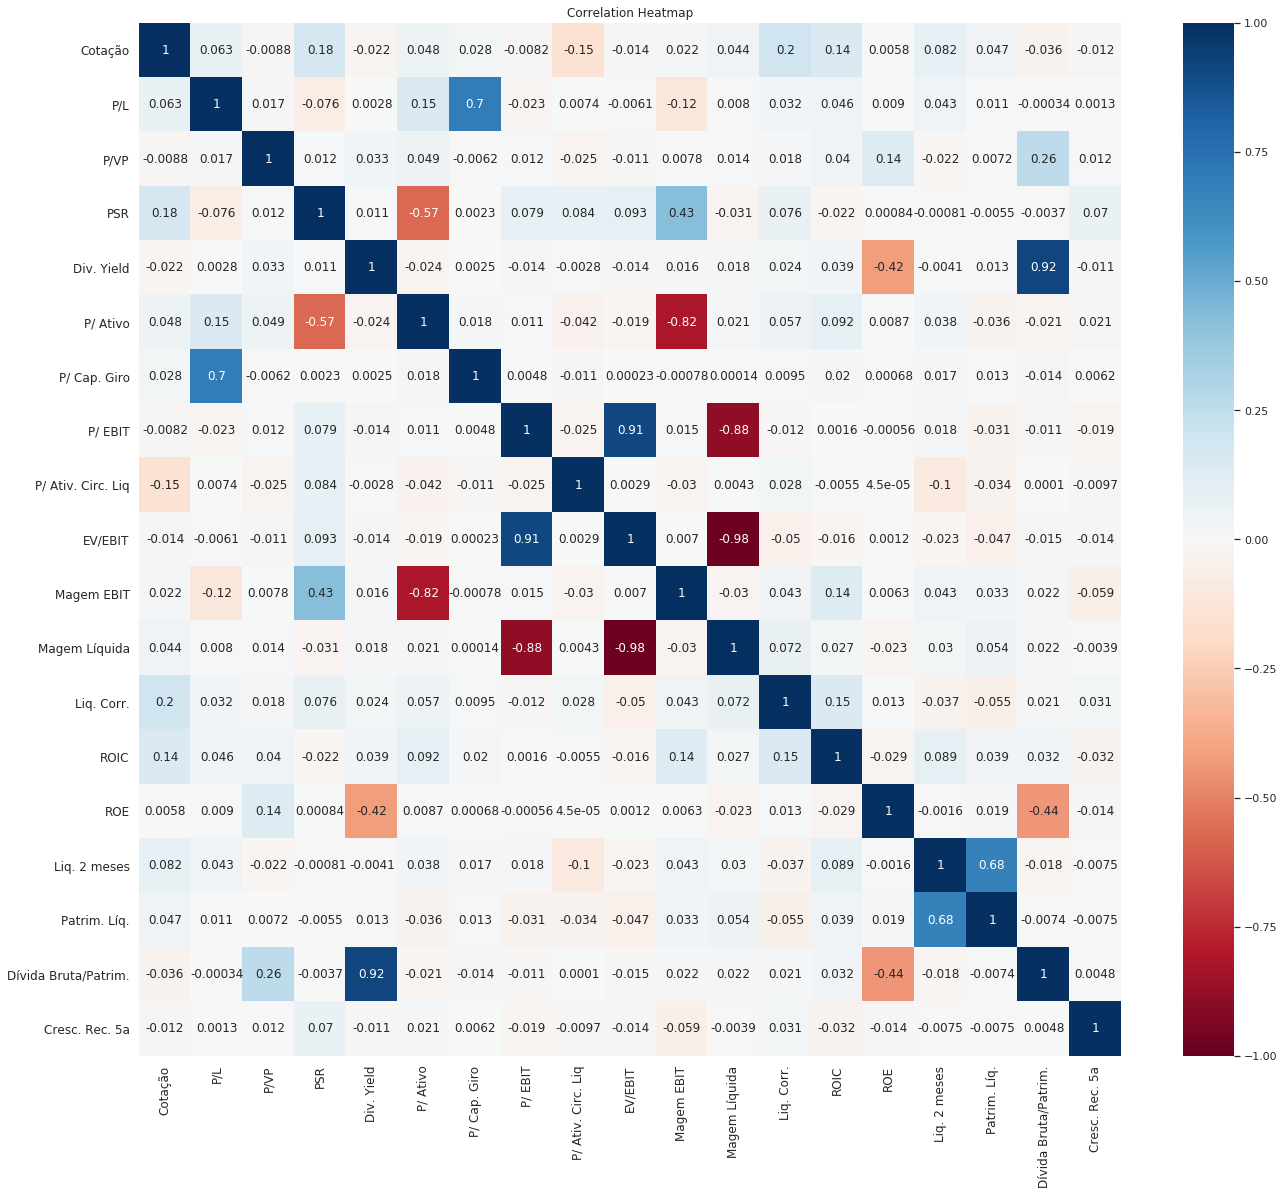

In [7]:
plt.figure(figsize = (22, 19))
s = sns.heatmap(df_segmentation.corr(),
               annot = True, 
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()